In [1]:
#Step 1

import numpy as np
from numpy import asarray
from itertools import combinations

def polynomialFeatures(X, degree):
    
    #insert 1 in all array/matrix
    if degree == 1:
        X.insert(0,1)
        result = X
        return result
    
    newMatrix = []    #list to store the new matrix
    
    for index in range(len(X)):
        ab = []                  #list to store the product of two combination of the variable(a,b)
        polySet = []             #list to store the value with a^2, b^2, c^2....
        result = X[index]        
        actualValue = np.array(result) 
        finalResult = []         #the final matrix for each degree
        
        for i in range(2, degree + 1):
            combinationPair = list(combinations(result,i))
            for pair in combinationPair:
                a = np.prod(pair)
                ab.append(a)
            polyValue = np.power(result, i)
            polySet.append(polyValue)
            
        if(degree > 2):
            polyAB = recursive(result, degree)
            finalResult = np.concatenate((1,actualValue,ab,polySet, polyAB), axis=None) 
        else:
            finalResult = np.concatenate((1,actualValue,ab,polySet), axis=None)
            
        newMatrix.append(finalResult)
        
    return np.array(newMatrix)

def recursive(result, degree):
    polyAB = []    #set of value with a^2*b, ab^2...
    final = []     #set of final result with all the polynomial multiplication
    newList = []   #a list to store the update polynomial values for recursion
    for j in range(2, degree):
        if degree > 2: 
            newList = recursive(result, degree-1)
        polyValue = np.power(result, j)
        resultValue = np.power(result, degree-j)
        
        for k in range(len(resultValue)):
            for m in range(len(polyValue)):
                #multiple the value of two lists
                if(m != k and (polyValue[m] * resultValue[k] not in polyAB)):
                    polyAB.append(polyValue[m]*resultValue[k])
                    
    final = np.concatenate((polyAB, newList), axis=None)
    
    return final

data = ([[1,2],[2,3]])
print(polynomialFeatures(data, 3))

[[ 1.  1.  2.  2.  1.  4.  1.  8.  4.  2.]
 [ 1.  2.  3.  6.  4.  9.  8. 27. 18. 12.]]


In [2]:
#Step 2
def mse(Y_test, Y_pred):
    return np.mean(pow((np.array(Y_test) - np.array(Y_pred)),2))
    

In [3]:
#Step 3
import math

def partitionSplit(trainSetSize, folds):
    s_partition = []
    dfCopy = df
    #set the size for each partiton
    eachPartition = int(len(trainSetSize) / folds)
    for i in range(folds):
        partition = []
        #going through each partition
        for j in range(eachPartition):
            if(len(partition) < eachPartition):
                value = dfCopy.index[0]
                partition.append(value.tolist())
                dfCopy = dfCopy.drop(value)
        s_partition.append((np.asarray(partition)).tolist())
  
    return s_partition

def trainDataSize(df, train_size):
    s_partition = []
    trainSize = train_size
    dataSize = int(df.shape[0])

    while trainSize < dataSize:
        partition = []
        for i in range(trainSize):
            if(len(partition) < trainSize):
                    value = df.index[i]
                    partition.append(value.tolist())
        s_partition.append((np.asarray(partition)).tolist())
        trainSize+=train_size
  
    return s_partition

def learning_curve(model, X, Y, cv, train_size=10, learning_rate=0.01, epochs=1000, tol=None, regularizer=None, lambd=0.0):
    finalTrainErrorSet = []
    finalValidationErrorSet = []
    trainSetSize = trainDataSize(X, train_size)
    
    for i in range(len(trainSetSize)):
        x = trainSetSize[i]
        splitX = partitionSplit(x, cv)
        train_scores = [] 
        val_scores = []
        #loop to choose a partition as validation set
        for i, partition in enumerate(splitX):
            trainSet = list(splitX)

            del(trainSet[i])       #dropping the validation set
            trainSet = sum(trainSet, [])

            validationSet = []           #getting the validation set 
            for row in partition:
                validationSet.append(row)  #put data in validation set into a new list

            #splitting the data into train and test set
            xTrainValues = []
            yTrainValues = []     
            for trainIndex in trainSet:
                xTrainValues.append(X.loc[trainIndex])
                yTrainValues.append(Y.loc[trainIndex])

            #splitting the validation set data into train and test set
            xValidationValues = []
            yValidationValues = []
            for testIndex in validationSet:
                xValidationValues.append(X.loc[testIndex])
                yValidationValues.append(Y.loc[testIndex])
                
            #perform prediction using Linear Regression
            if model == 'Linear_Regression':
                modelRegression = Linear_Regression()
                modelRegression.fit(np.array(xTrainValues), np.array(yTrainValues), learning_rate, epochs, tol, regularizer,lambd)
                
                yTestPredict = modelRegression.predict(np.array(xValidationValues))
                validation_error = math.sqrt(mse(yValidationValues, yTestPredict))
                val_scores.append(validation_error)
                
                yTrainPredict = modelRegression.predict(np.array(xTrainValues))
                train_error = math.sqrt(mse(yTrainValues, yTrainPredict))
                train_scores.append(train_error)
                
        avgFinalTrainError = sum(train_scores)/cv
        finalTrainErrorSet.append(avgFinalTrainError)
        
        avgFinalValidationError = sum(val_scores)/cv
        finalValidationErrorSet.append(avgFinalValidationError)
        
    return finalTrainErrorSet, finalValidationErrorSet
    

In [4]:
#Step 4

def trainDataSizeLC(df, train_size):
    s_partition = []
    trainSize = train_size
    dataSize = int(df.shape[0])

    while trainSize < dataSize:
        partition = []
        for i in range(trainSize):
            if(len(partition) < trainSize):
                    value = df[i]
                    partition.append(value.tolist())
        s_partition.append((np.asarray(partition)).tolist())
        trainSize+=train_size
  
    return s_partition

def fitLC(model, X, Y, cv, train_size=10, learning_rate=0.01, epochs=1000, tol=None, regularizer=None, lambd=0.0):
    finalTrainErrorSet = []
    finalValidationErrorSet = []
    trainSetSize = trainDataSizeLC(X, train_size)
    
    for i in range(len(trainSetSize)):
        x = trainSetSize[i]
        splitX = partitionSplit(x, cv)
        train_scores = [] 
        val_scores = []
        #loop to choose a partition as validation set
        for i, partition in enumerate(splitX):
            trainSet = list(splitX)

            del(trainSet[i])       #dropping the validation set
            trainSet = sum(trainSet, [])

            validationSet = []           #getting the validation set 
            for row in partition:
                validationSet.append(row)  #put data in validation set into a new list

            #splitting the data into train and test set
            xTrainValues = []
            yTrainValues = []     
            for trainIndex in trainSet:
                xTrainValues.append(X[trainIndex])
                yTrainValues.append(Y[trainIndex])

            #splitting the validation set data into train and test set
            xValidationValues = []
            yValidationValues = []
            for testIndex in validationSet:
                xValidationValues.append(X[testIndex])
                yValidationValues.append(Y[testIndex])
                
            #perform prediction using Linear Regression
            if model == 'Linear_Regression':
                modelRegression = Linear_Regression()
                modelRegression.fit(np.array(xTrainValues), np.array(yTrainValues), learning_rate, epochs, tol, regularizer,lambd)
                
                yTestPredict = modelRegression.predict(np.array(xValidationValues))
                validation_error = math.sqrt(mse(yValidationValues, yTestPredict))
                val_scores.append(validation_error)
                
                yTrainPredict = modelRegression.predict(np.array(xTrainValues))
                train_error = math.sqrt(mse(yTrainValues, yTrainPredict))
                train_scores.append(train_error)
                
        avgFinalTrainError = sum(train_scores)/cv
        finalTrainErrorSet.append(avgFinalTrainError)
        
        avgFinalValidationError = sum(val_scores)/cv
        finalValidationErrorSet.append(avgFinalValidationError)
        
    return finalTrainErrorSet, finalValidationErrorSet


def plot_polynomial_model_complexity(model, X, Y, cv, maxPolynomialDegree, 
                                 learning_rate=0.01, epochs=1000, tol=None, 
                                 regularizer=None, lambd=0.0):

    # Take data matrix X (training data matrix X) and the maxPolynomialDegree and for 
    # each polynomial degree it will augment the data matrix
    
    finalTrainRMSE = []
    finalValidationRMSE = []
    
    for i in range(1, (maxPolynomialDegree+1)):
        X_augmented = polynomialFeatures(np.array(X), maxPolynomialDegree)
    
    
        # Call k-fold here
        # Computes the average mse for both the training and the validation fold
        # For training the model (using the “fit” method) it will use the model 
        # parameters from the function argument. 
        
        TrainRMSE, ValidationRMSE = fitLC(model,X_augmented, Y, cv, train_size=20, 
                                          learning_rate=learning_rate, epochs=epochs, 
                                          tol=tol, regularizer=regularizer)
        
        finalTrainRMSE.append(TrainRMSE)
        finalValidationRMSE.append(ValidationRMSE)
        
        print(finalTrainRMSE)
        print(finalValidationRMSE)
    # Finally, the function will plot the root-mean-square error(rmse) values for the training and 
    # validation folds for each degree of the data matrix starting from 1 up to the maxPolynomialDegree.
    
    x = []
    for i in range(1, (maxPolynomialDegree+1)):
        x.append(maxPolynomialDegree)
    
    fig = plt.figure(figsize=(10, 6))
    plt.plot(x, finalTrainRMSE, color='red', linewidth=5, linestyle='--')
    plt.plot(x, finalValidationRMSE, color='blue', linewidth=5, linestyle='--') 
    plt.title('Root-Mean-Square Error')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('RSME')
    plt.show()

In [5]:
# Step 5

class Linear_Regression: 
    
    def __init__(self):
        pass
        
    def fit(self, X, Y, learning_rate=0.01, epochs=1000, tol=None, regularizer=None, lambd=0.0):
        self.m, self.col = X.shape
        self.X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)  #add a bias term into features
        self.Y = Y
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.tol = tol
        self.lambd = lambd
        self.cost = 0
        self.theta = np.zeros(X.shape[1] + 1) #dimension of theta (d+1), where d is the number of features
    
        for i in range(self.epochs):
            #lasso regression
            if regularizer == "l1": 
                self.lasso_regression()

            #ridge regression    
            elif regularizer == "l2": 
                self.ridge_regression()

            #None    
            else: 
                yPredict = np.dot(self.X, self.theta)
                
                self.gradientVector = (self.learning_rate/self.m) * (np.dot((self.X.T), (yPredict-self.Y)))
                
                self.costFunction = self.learning_rate/(2*self.m) * np.sum((self.Y-yPredict)**2)
            
            #Update Weights
            self.theta = self.theta - self.gradientVector
            
            if self.tol is not None:
                if (abs(self.previous_cost-self.costFunction) < self.tol):
                    break
                    
            #Update Cost/error
            self.previous_cost = self.costFunction
    
    def lasso_regression(self):
        yPredict = np.dot(self.X, self.theta)
        
        self.gradientVector = (self.learning_rate/self.m) * (np.dot((self.X.T), (yPredict-self.Y)))-((self.learning_rate*self.lambd*np.sign(self.theta))/self.m)
        
        self.costFunction = self.learning_rate/(2*self.m) * np.sum((self.Y-yPredict)**2)
        
    def ridge_regression(self):
        yPredict = np.dot(self.X, self.theta)
        
        self.gradientVector = (self.learning_rate/self.m) * (np.dot((self.X.T), (yPredict-self.Y)))-((self.learning_rate*self.lambd*self.theta)/self.m)
            
        self.costFunction = self.learning_rate/(2*self.m) * np.sum((self.Y-yPredict)**2)
        
    def predict(self, X):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        return  np.dot(X, self.theta)


In [6]:
#Step 15

class Stochastic_Regression: 
    
    def __init__(self):
        pass
        
    def fit(self, X, Y, learning_rate=0.01, epochs=1000, tol=None, regularizer=None, lambd=0.0):
        self.m, self.col = X.shape
        self.X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)  #add a bias term into features
        self.Y = Y
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.tol = tol
        self.lambd = lambd
        self.cost = 0
        self.theta = np.zeros(X.shape[1] + 1) #dimension of theta (d+1), where d is the number of features
    
        for i in range(self.epochs):
            
            for j in range(self.m):
                
                #lasso regression
                if regularizer == "l1": 
                    self.lasso_regression(j)

                #ridge regression    
                elif regularizer == "l2": 
                    self.ridge_regression(j)

                #None    
                else: 
                    self.Y = Y[j]
                    yPredict = np.dot(self.X[j],self.theta)

                    self.gradientVector = self.learning_rate *(self.X[j]*(yPredict-self.Y[j]))
                    
            #Update Weights
            self.theta = self.theta - self.gradientVector
            
            #Update Cost
            yPredict = np.dot(self.X, self.theta)

            self.costFunction = self.learning_rate/(2*self.m) * np.sum((self.Y-yPredict)**2)
            
            if self.tol is not None:
                if (abs(self.previous_cost-self.costFunction) < self.tol):
                    break
                    
            #Update Cost/error
            self.previous_cost = self.costFunction
    
    def lasso_regression(self, j):
        yPredict = np.dot(self.X[j],self.theta)
        
        self.gradientVector = self.learning_rate *(self.X[j]*(yPredict-self.Y[j]) + (self.lambd*np.sign(self.theta)))
        
        
    def ridge_regression(self, j):
        yPredict = np.dot(self.X[j],self.theta)
        
        self.gradientVector = self.learning_rate *(self.X[j]*(yPredict-self.Y[j]) + (self.lambd*(self.theta)))
        
    def predict(self, X):
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        return np.dot(X, self.theta)

In [7]:
#Step 6
import pandas as pd

# Read the CSV as a Pandas Data Frame
df = pd.read_csv('winequality-red.csv', sep = ';', skipinitialspace=True)

In [8]:
#Step 7
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
#Step 8

#Shuffling the rows of the data
df = df.sample(frac=1) 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1309,7.0,0.62,0.10,1.4,0.071,27.0,63.0,0.99600,3.28,0.61,9.2,5
533,10.3,0.27,0.24,2.1,0.072,15.0,33.0,0.99560,3.22,0.66,12.8,6
954,7.6,0.43,0.40,2.7,0.082,6.0,11.0,0.99538,3.44,0.54,12.2,6
922,8.4,0.62,0.12,1.8,0.072,38.0,46.0,0.99504,3.38,0.89,11.8,6
409,12.5,0.46,0.49,4.5,0.070,26.0,49.0,0.99810,3.05,0.57,9.6,4


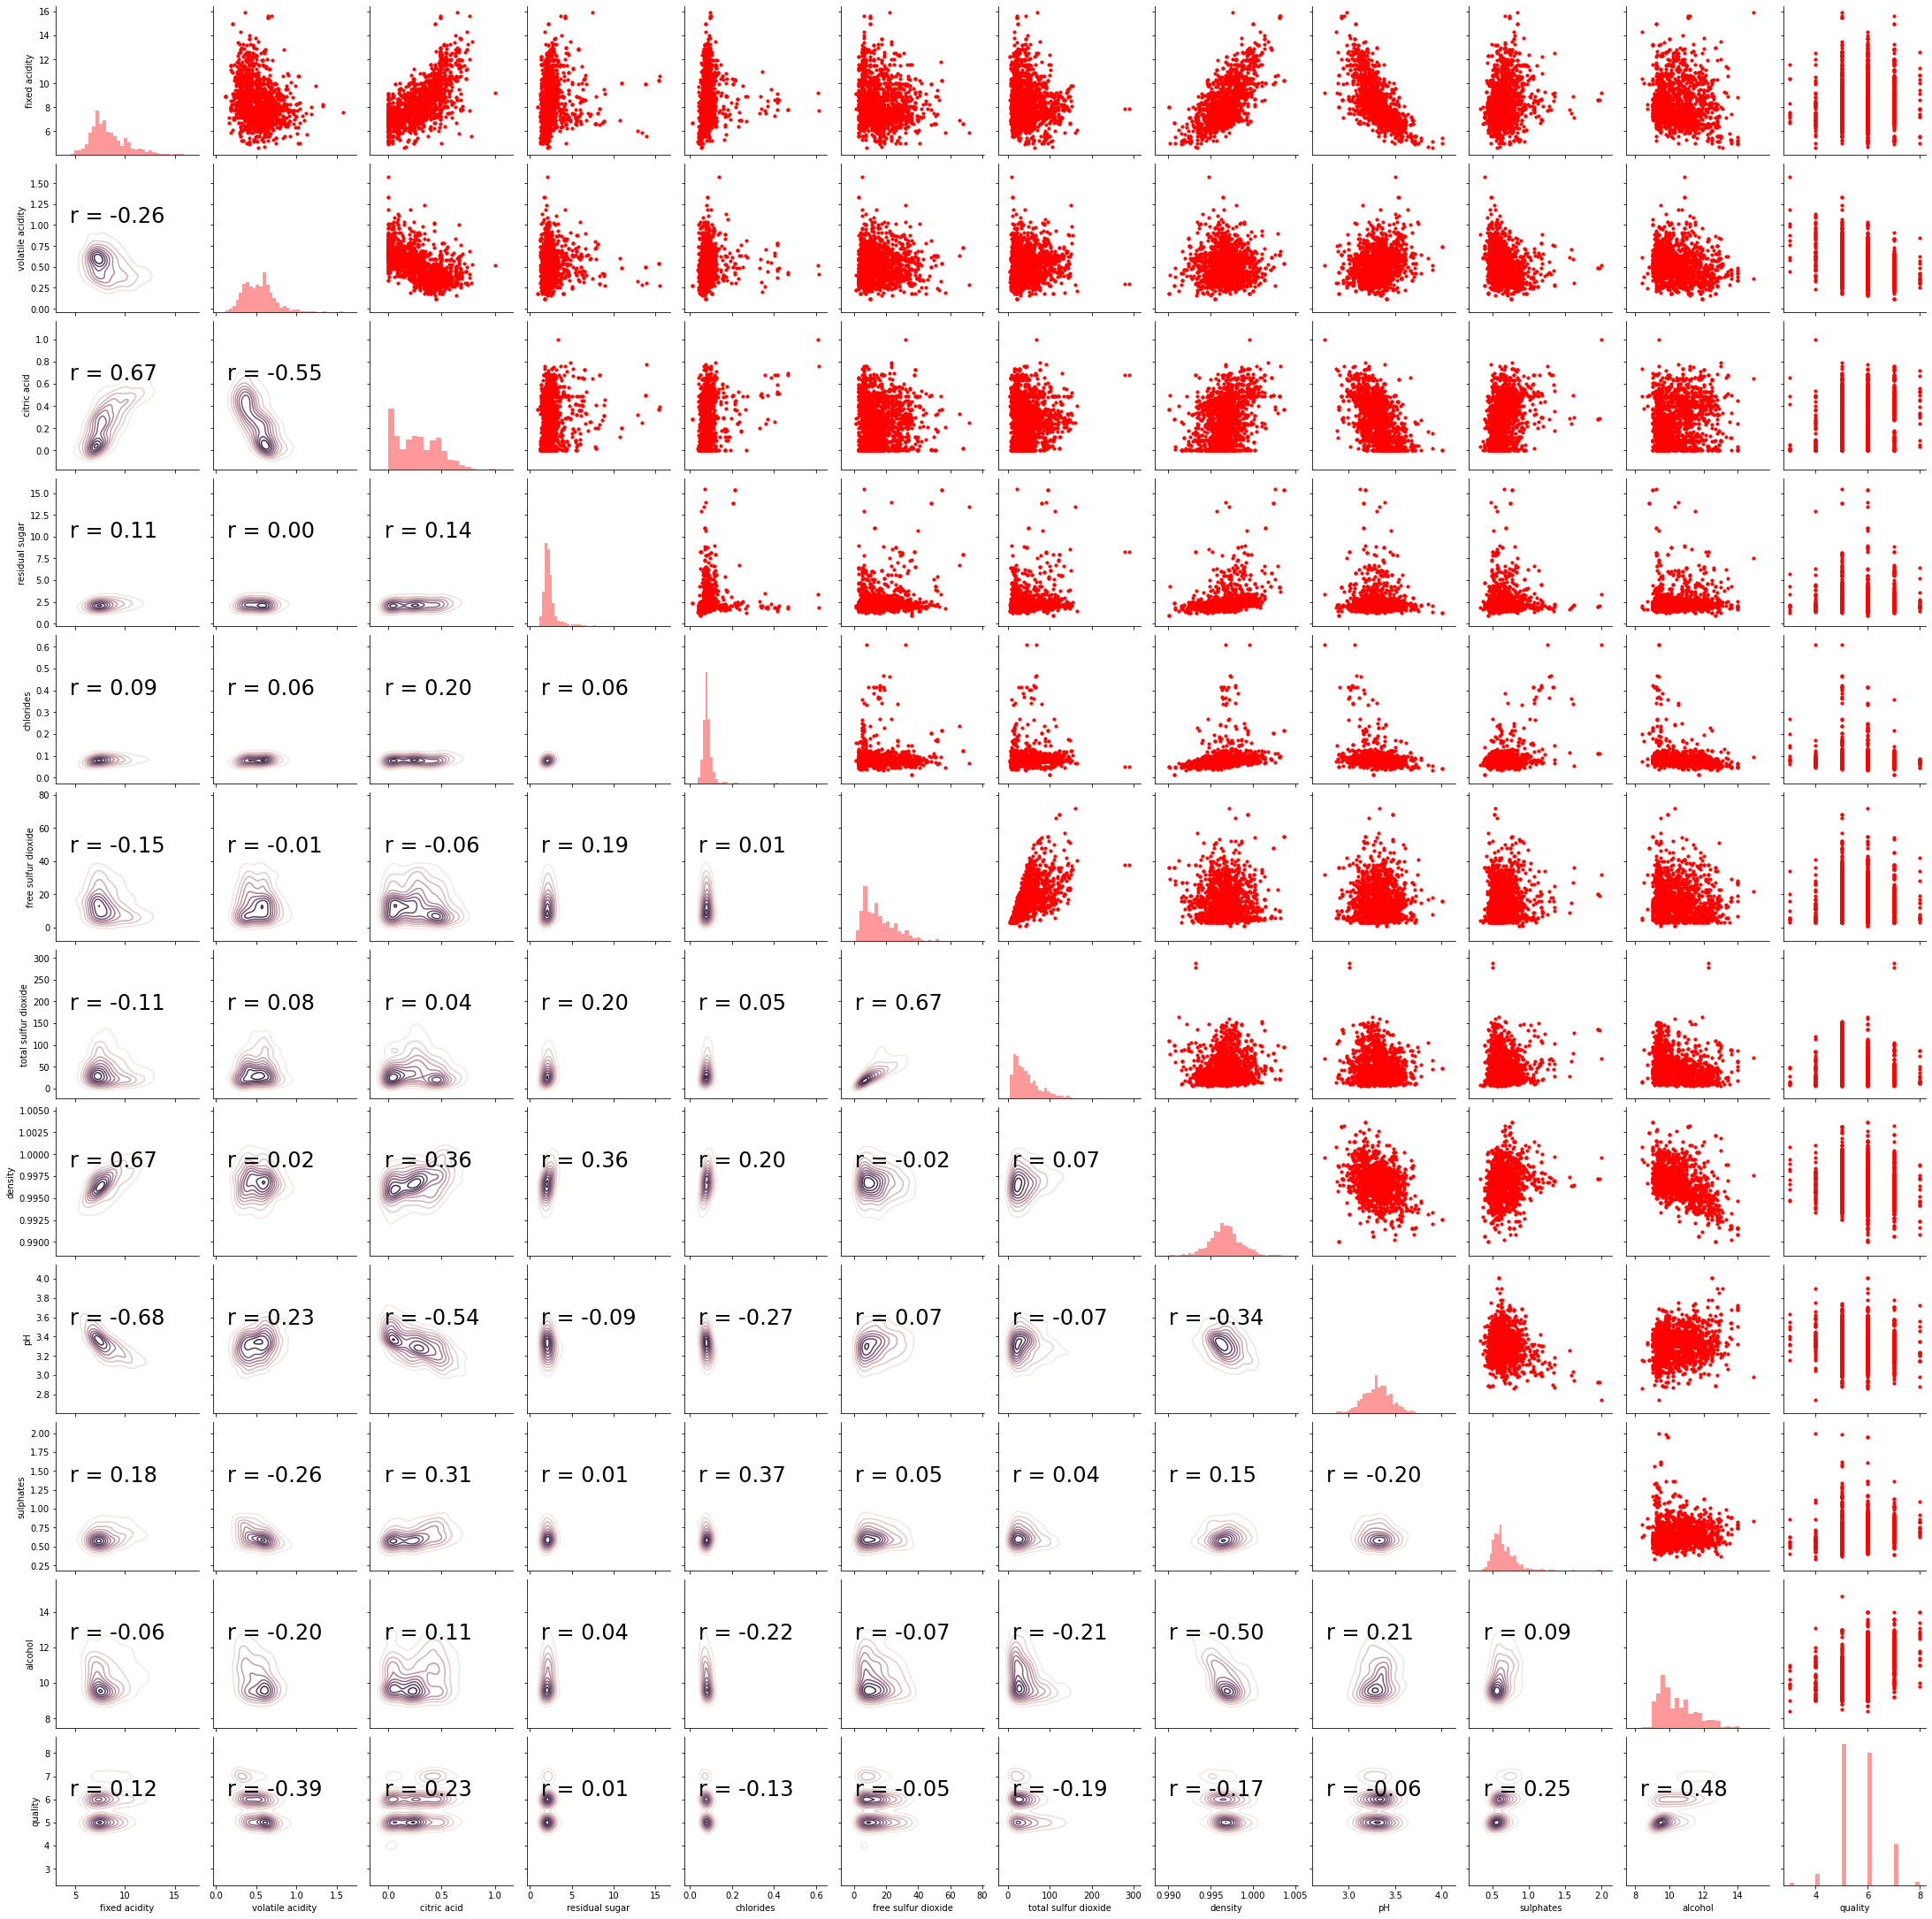

In [10]:
#Step 9

# Generating the pair plot using the seaborn package
import warnings
warnings.filterwarnings('ignore')

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [10]:
#Step 10

#function to standardize the data
def standardizeData(dataSet):
    for key, values in dataSet.iteritems():
        mean = dataSet[key].mean()
        std = dataSet[key].std()
        if key != 'quality':
            dataSet[key] = (dataSet[key] - mean) / std
    return dataSet

standardizeData = standardizeData(df)

#separate the target vector and features
def separateTargetVector(dataSet):
    y = df['quality'] #target vector
    X = df.drop(columns='quality') #features matrix
    return X,y

#function for the s-fold validation
def sFold(folds, data, labels, model, error_function, dictionary): 
    avgError = [] 
    splitX = partitionSplit(data, folds)
    minError = 100.0
    
    #loop to choose a partition as validation set
    for i, partition in enumerate(splitX):
        trainSet = list(splitX)
        del(trainSet[i])       #dropping the validation set
        trainSet = sum(trainSet, [])

        testSet = []           #getting the validation set 
        for row in partition:
            testSet.append(row)  #put data in validation set into a new list 
            
        #splitting the data into train and test set
        xTrainValues = []
        yTrainValues = []        
        for trainIndex in trainSet:
            xTrainValues.append(data.loc[trainIndex])
            yTrainValues.append(labels.loc[trainIndex])

        #splitting the validation set data into train and test set
        xTestValues = []
        yTestValues = []
        for testIndex in testSet:
            xTestValues.append(data.loc[testIndex])
            yTestValues.append(labels.loc[testIndex])
    
        #preform prediction using Linear Regression
        if model == 'Linear_Regression':
            modelClassifier = Linear_Regression()
            modelClassifier.fit(np.array(xTrainValues), np.array(yTrainValues), learning_rate = dictionary.get('learning_rate'), epochs=1000, tol=None, regularizer = dictionary.get('regularizer'), lambd = dictionary.get('lambd'))
            yPredict= modelClassifier.predict(np.array(xTestValues))
            
            #calculating the error using mse score
            if error_function == "mse":
                error = mse(yTestValues, yPredict)
                avgError.append(error)
        
    avgFinalError = sum(avgError)/folds
    if(avgFinalError < minError):
        minError = avgFinalError
        print("Average Error: %f" %avgFinalError)
        print("Lambda: %.4f" %dictionary.get('lambd'))
        print("Learning Rate: %.4f" %dictionary.get('learning_rate')) 
        print("Regularizer: %s" %dictionary.get('regularizer'))
        print("\n")


#function to pass the hyperparameter into s-fold validation
def dictionary(lambd, learning_rate, regularizer):
    modelArgs = dict()
    #form the dictionary
    for eachLambd in lambd:
        for eachLearningRate in learning_rate:
            for eachRegularizer in regularizer:
                modelArgs = {'lambd' : eachLambd, 'learning_rate' : eachLearningRate,'regularizer': eachRegularizer}
                #use of s-folds
                sFold(5, X, y, 'Linear_Regression', 'mse', modelArgs)
                

#get the X data(features without target) and y data(target column)
X,y = separateTargetVector(standardizeData)
                
lambd = [1.0, 0,0.1,0.01, 0.001, 0.0001]
learning_rate = [0.1, 0.01, 0.001, 0.0001]
regularizer = ['l1', 'l2']

dictionary(lambd,learning_rate,regularizer)

Average Error: 0.420726
Lambda: 1.0000
Learning Rate: 0.1000
Regularizer: l1


Average Error: 0.420737
Lambda: 1.0000
Learning Rate: 0.1000
Regularizer: l2


Average Error: 0.420245
Lambda: 1.0000
Learning Rate: 0.0100
Regularizer: l1


Average Error: 0.420218
Lambda: 1.0000
Learning Rate: 0.0100
Regularizer: l2


Average Error: 4.773519
Lambda: 1.0000
Learning Rate: 0.0010
Regularizer: l1


Average Error: 4.770673
Lambda: 1.0000
Learning Rate: 0.0010
Regularizer: l2


Average Error: 26.626989
Lambda: 1.0000
Learning Rate: 0.0001
Regularizer: l1


Average Error: 26.627630
Lambda: 1.0000
Learning Rate: 0.0001
Regularizer: l2


Average Error: 0.420677
Lambda: 0.0000
Learning Rate: 0.1000
Regularizer: l1


Average Error: 0.420677
Lambda: 0.0000
Learning Rate: 0.1000
Regularizer: l2


Average Error: 0.420187
Lambda: 0.0000
Learning Rate: 0.0100
Regularizer: l1


Average Error: 0.420187
Lambda: 0.0000
Learning Rate: 0.0100
Regularizer: l2


Average Error: 4.775546
Lambda: 0.0000
Learning Ra

In [16]:
#Step 11

# From evaluating our model, we get the most optimum hyperparameters for: 
# lambd = 0.0001, learning_rate =0.01 , regularizer = l2
# Then we run the Linear Regression with those hyperparameters and get mean square error

# Splitting the data into Train Set and Test Set
def partition(X,y,t):
    x_train = np.array(X[int((len(X)+1)*t):])
    x_test = np.array(X[:int((len(X)+1)*t)])
    y_train = np.array(y[int((len(y)+1)*t):])
    y_test = np.array(y[:int((len(y)+1)*t)]) 
    return x_train, x_test, y_train, y_test

X,y = separateTargetVector(standardizeData)

#set to 0.2, 80% of the data will be used for training and 20% for testing.
xTrain, xTest, yTrain, yTest = partition(X, y, 0.2)
modelClassifier = Linear_Regression()
modelClassifier.fit(xTrain, yTrain, learning_rate=0.01, epochs=1000, tol=None, regularizer='l2', lambd=0.0001)
y_train_predict = modelClassifier.predict(xTest)
y_predict = np.array(y_train_predict)

print('Mean Square Error for Gradient Descent:', mse(yTest, y_predict))


Mean Square Error for Gradient Descent: 0.43733360212166233


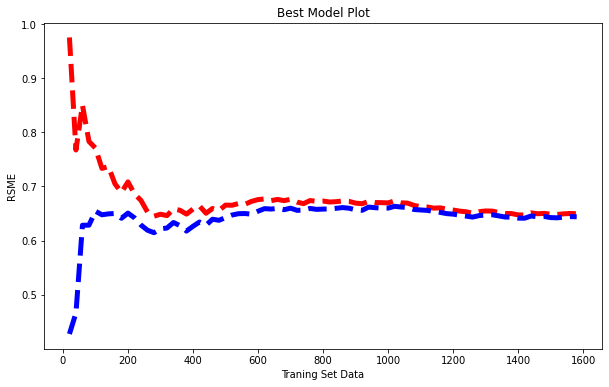

In [162]:
#Step 12
import matplotlib.pyplot as plt
%matplotlib inline

X,y = separateTargetVector(standardizeData)
trainSize = 20
train_scores, val_scores= learning_curve("Linear_Regression", X, y, 5, train_size=trainSize, learning_rate=0.01, 
                                          epochs=1000, tol=None, regularizer="l2", lambd=0.0001)

x = []
i = trainSize
while i < len(X):
    x.append(i)
    i = i + trainSize

#Plotting
fig = plt.figure(figsize=(10, 6))
plt.plot(x, val_scores, color='red', linewidth=5, linestyle='--')
plt.plot(x, train_scores, color='blue', linewidth=5, linestyle='--') 
plt.title('Best Model Plot')
plt.xlabel('Traning Set Data')
plt.ylabel('RSME')
plt.show()


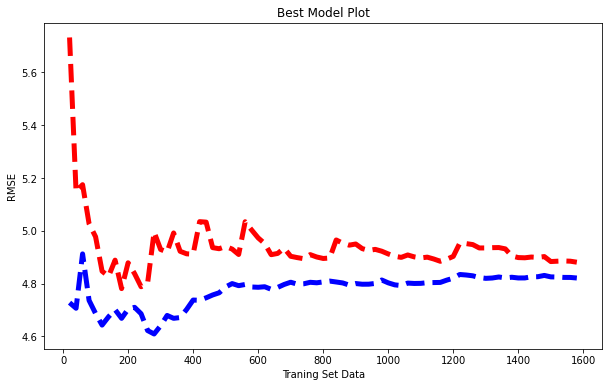

In [171]:
#Step 13

X,y = separateTargetVector(standardizeData)
newX = polynomialFeatures(np.array(X), 3)

trainSize = 20
train_scores, val_scores= fitLC("Linear_Regression", newX, y, 5, train_size=trainSize, learning_rate=0.00001, 
                                          epochs=1000, tol=None, regularizer="l2", lambd=0.0001)

x = []
i = trainSize
while i < len(X):
    x.append(i)
    i = i + trainSize

#Plotting
fig = plt.figure(figsize=(10, 6))
plt.plot(x, val_scores, color='red', linewidth=5, linestyle='--')
plt.plot(x, train_scores, color='blue', linewidth=5, linestyle='--') 
plt.title('Best Model Plot')
plt.xlabel('Traning Set Data')
plt.ylabel('RMSE')
plt.show()

In [ ]:
#Step 14

plot_polynomial_model_complexity('Linear_Regression', X, y, 5, maxPolynomialDegree = 5, 
                                 learning_rate=0.0000001, epochs=1000, tol=None, 
                                 regularizer=12, lambd=0.01)

In [173]:
#Step 15

#function for the s-fold validation
def sFold(folds, data, labels, model, error_function, dictionary): 
    avgError = [] 
    splitX = partitionSplit(data, folds)
    minError = 100.0
    
    #loop to choose a partition as validation set
    for i, partition in enumerate(splitX):
        trainSet = list(splitX)
        del(trainSet[i])       #dropping the validation set
        trainSet = sum(trainSet, [])

        testSet = []           #getting the validation set 
        for row in partition:
            testSet.append(row)  #put data in validation set into a new list 
            
        #splitting the data into train and test set
        xTrainValues = []
        yTrainValues = []        
        for trainIndex in trainSet:
            xTrainValues.append(data.loc[trainIndex])
            yTrainValues.append(labels.loc[trainIndex])

        #splitting the validation set data into train and test set
        xTestValues = []
        yTestValues = []
        for testIndex in testSet:
            xTestValues.append(data.loc[testIndex])
            yTestValues.append(labels.loc[testIndex])
            
        #preform prediction using Stochastic Regression
        if model == 'Stochastic_Regression':
            modelClassifier = Stochastic_Regression()
            modelClassifier.fit(np.array(xTrainValues), np.array(yTrainValues), learning_rate = dictionary.get('learning_rate'), epochs=1000, tol=None, regularizer = dictionary.get('regularizer'), lambd = dictionary.get('lambd'))
            yPredict= modelClassifier.predict(np.array(xTestValues))
            
            #calculating the error using mse score
            if error_function == "mse":
                error = mse(yTestValues, yPredict)
                avgError.append(error)
        
    avgFinalError = sum(avgError)/folds
    if(avgFinalError < minError):
        minError = avgFinalError
        print("Average Error: %f" %avgFinalError)
        print("Lambda: %.4f" %dictionary.get('lambd'))
        print("Learning Rate: %.4f" %dictionary.get('learning_rate')) 
        print("Regularizer: %s" %dictionary.get('regularizer'))
        print("\n")


#function to pass the hyperparameter into s-fold validation
def dictionary(lambd, learning_rate, regularizer):
    modelArgs = dict()
    #form the dictionary
    for eachLambd in lambd:
        for eachLearningRate in learning_rate:
            for eachRegularizer in regularizer:
                modelArgs = {'lambd' : eachLambd, 'learning_rate' : eachLearningRate,'regularizer': eachRegularizer}
                #use of s-folds
                sFold(5, X, y, 'Stochastic_Regression', 'mse', modelArgs)
                

#get the X data(features without target) and y data(target column)
X,y = separateTargetVector(standardizeData)
                
lambd = [1.0, 0,0.1,0.01, 0.001, 0.0001]
learning_rate = [0.1, 0.01, 0.001, 0.0001]
regularizer = ['l1', 'l2']

dictionary(lambd,learning_rate,regularizer)

Average Error: 23.083042
Lambda: 1.0000
Learning Rate: 0.0100
Regularizer: l1


Average Error: 27.701166
Lambda: 1.0000
Learning Rate: 0.0100
Regularizer: l2


Average Error: 26.205892
Lambda: 1.0000
Learning Rate: 0.0010
Regularizer: l1


Average Error: 27.700208
Lambda: 1.0000
Learning Rate: 0.0010
Regularizer: l2


Average Error: 28.579321
Lambda: 1.0000
Learning Rate: 0.0001
Regularizer: l1


Average Error: 28.302020
Lambda: 1.0000
Learning Rate: 0.0001
Regularizer: l2


Average Error: 28.105285
Lambda: 0.0000
Learning Rate: 0.0100
Regularizer: l1


Average Error: 28.105285
Lambda: 0.0000
Learning Rate: 0.0100
Regularizer: l2


Average Error: 28.098745
Lambda: 0.0000
Learning Rate: 0.0010
Regularizer: l1


Average Error: 28.098745
Lambda: 0.0000
Learning Rate: 0.0010
Regularizer: l2


Average Error: 28.207111
Lambda: 0.0000
Learning Rate: 0.0001
Regularizer: l1


Average Error: 28.207111
Lambda: 0.0000
Learning Rate: 0.0001
Regularizer: l2


Average Error: 26.480140
Lambda: 0.1000


In [174]:
#Step 15

stochasticClassifier = Stochastic_Regression()
stochasticClassifier.fit(xTrain, yTrain, learning_rate=0.0001, epochs=1000, tol=None, regularizer='l1', lambd=0.01)
y_train_predict = stochasticClassifier.predict(xTest)
y_predict = np.array(y_train_predict)

print('Mean Square Error for Stochastic Gradient:', mse(yTest, y_predict))

Mean Square Error for Stochastic Gradient: 27.725930229355832
